In [6]:
import glob, re
import os
import warnings
import pprint
import json
import pandas as pd
import datetime
from bs4 import BeautifulSoup
warnings.filterwarnings(action='ignore', category=UserWarning, module='bs4')
# bs4 va causer des erreurs de type UserWarning, on les ignore

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# l'éxecution de quelques cellules prend un peu de temps, 
# pour voir l'avancement, j'utilise le module logging à afficher des messages d'information

In [8]:
def read(path_fichier):
    with open(path_fichier, encoding = "utf8") as f:
        html_doc = f.read()
    return BeautifulSoup(html_doc, 'html.parser')

def enlever_nombres(texte):
    texte = re.sub("[0-9]+|[0-9]+[,\.-][0-9]+", "", texte)
    texte = re.sub("\'\'", "",  texte)
    # ce corpus contient plusieurs fois des nombres liés par ''
    return texte

def update_vocabulaire(set_mots, vocabulaire):
    dejavu = vocabulaire.intersection(set_mots)
    nouveau = set_mots.difference(vocabulaire)
    for x in set_mots:
        vocabulaire.add(x) # les types du corpus jusqu'à ce texte-là
    return vocabulaire, dejavu, nouveau

In [9]:
def isupper_lower(mots):
    mots_captalise= [mot for mot in mots if mot[0].isupper()==True]
    return len(mots_captalise)

def get_effectifs (liste_mots):                        
    dic_longueurs = {} 
    for mot in liste_mots:
        longueurs = len(mot)
        if longueurs not in dic_longueurs:
            dic_longueurs[longueurs] = 0
        dic_longueurs[longueurs]+= 1 
    return dic_longueurs 
                   
def get_taille(dic_longueurs):
    liste_effectifs = []
    for lon in range(0,31):
        if lon in dic_longueurs:
            liste_effectifs.append(dic_longueurs[lon])
        else:
            liste_effectifs.append(0)         
    return liste_effectifs   

In [11]:
def memoire_friendly(dico, path): 
    # pour sauvegarder des dictionnaires dans un même fichier json
    try:
        with open(path, 'r') as f:
            old_dict = json.load(f)
    except:
        old_dict = {}
    new_dict = {**old_dict, **dico}
    
    for key in new_dict:
        new_dict[key] = list(new_dict[key])
        
    with open(path, 'w') as f:
        f.write(json.dumps(new_dict, indent=4, ensure_ascii=False))


def read_json_file(file_path):
    # pour lire un fichier json qui contient des dictionnaires
    with open(file_path,encoding='utf8') as f:
        data = json.load(f)
    return data

## Test d'échantillon

In [17]:
path = os.getcwd() + "/corpus/Annee1999/" 
path_fichier = path+"1999-05-17.xml"
soup = read(path_fichier)
#Créons un vocabulaire tiré de ce fichier du texte
L = []
for d in soup.find_all("div", type="article"):
    texte = d.text
    texte = enlever_nombres(texte)
    mots = re.findall("([A-ZÀ-ÿ][A-ZÀ-ÿ0-9.]+|[cCdDjJlLmnNsSt]'|[qQ]u'|\w+[\w'-]+\w+|\w\w+)", texte) # regex sans \S et sans chiffre
    L+=mots

In [18]:
print(len(sorted(set(L))))

30104


In [19]:
print(sorted(set(L), reverse=True)[-100:])
# visualisation de résualtats regex 
# cela me permets de voir que quelques sont mal tokenisés
# donc j'ajoute une étape de texte = re.sub("\'\'", "",  texte)

['ARCHE', 'ARCEY.', 'ARC.', 'ARC', 'APLEC', 'APF', 'APEM', 'ANVERS', 'ANTONIO', 'ANPE.', 'ANPE', 'ANIMATEUR', 'ANGUENOT', 'ANEP', 'ANCIENS', 'AN', 'AMPE', 'AMOUR', 'AMNEVILLE', 'AMNESTY', 'AMJB.', 'AMJB', 'AMITIE', 'AMIS', 'AMF', 'AME.', 'AMCC', 'AMC', 'ALSACE', 'ALPHA', 'ALP', 'ALEZ', 'ALCAH', 'ALBA', 'ALB', 'ALAID', 'AJOL.', 'AJLD', 'AJAL', 'AINVELLE', 'AINES', 'AIDES', 'AIDE', 'AHF', 'AH', 'AGSU.', 'AGSU', 'AGRICOLE', 'AGF', 'AGES', 'AG', 'AFN', 'AFM', 'AFFOUAGISTES', 'AFFAIRES', 'AFFAIRE', 'AERE', 'AEP', 'ADS', 'ADP.', 'ADMR', 'ADLD', 'ADF', 'ADEME', 'ADECCO', 'ADDIM.', 'ADASEA', 'ADAPAH', 'ADACIM', 'AD', 'ACTIVITES', 'ACPG', 'ACP', 'ACOB', 'ACMRN', 'ACGV', 'ACGF', 'ACF', 'ACCUEIL', 'ACCIDENTS', 'ACCA', 'ACC', 'ACBB', 'ACAM', 'ACADEMIE', 'AC', 'ABSENT', 'ABS', 'ABC', 'AB.', 'AB', 'AAPPMA', 'A.S.M.', 'A.S.', 'A.F.P.S.', 'A.D.', 'A.C.C.A', 'A.', 'A-MOUSSON', 'A-Cheniménil']


## Présentation du corpus et de la dictionnaire Glaff

###préparons notre vocabualire issu du glaff
import re, json
import glob

with open("freq_glaff_%i.json"%cpt, "w",encoding = "utf8") as w:
    w.write(json.dumps(dic_glaff,indent = 4, ensure_ascii = False)) #lisible pour l'humian
set_mots_glaff = set(dic_glaff.keys())
print("Taille Glaff : %i types"%len(set_mots_glaff))  # type(mot unique) VS token
#print("Entrée Glaff : %i formes"%(cpt)) 

In [7]:
with open("../freq_glaff_1406857.json", encoding="utf8") as t:
    dic_glaff = json.load(t)

set_mots_glaff = set(dic_glaff.keys())
print("Taille Glaff : %i types"%len(set_mots_glaff)) 

Taille Glaff : 1082688 types


## Traitement du corpus 
- tokeniser
- sauvegarder les tokens par jour 

In [8]:
import re
import datetime
articles_par_date = {}

for path_fichier in glob.glob("corpus/Annee1999/*"):
    
    date = (path_fichier.split("/")[-1])[:-4]
    #print(date)
    soup = read(path_fichier)
    liste_mots_par_jour =[]
    for cpt, d in enumerate(soup.find_all("div", type="article")):
        texte = d.text
        texte = enlever_nombres(texte)
        mots = re.findall("([A-ZÀ-ÿ][A-Z0-9.]+|[cCdDjJlLmnNsSt]'|[qQ]u'|\w+[\w'-]+\w+|\w\w+)", texte) #[\w'-]+
        #(\w+['-]\w+)+|\w+)
        # \w+['-]\w+ : les mots composés
        liste_mots_par_jour+=mots
        #save the set of words by day
    if date in articles_par_date:
        articles_par_date[date] = articles_par_date[date].union(set(liste_mots_par_jour))
    else:
        articles_par_date[date] = set(liste_mots_par_jour)

In [11]:
chemin_mots_Annee="./mot_par_jour/mot_articles_par_Annee1999.json"
memoire_friendly(articles_par_date, chemin_mots_Annee)
articles_par_date = read_json_file(chemin_mots_Annee)
print("%s a une collection de %s jours"%(chemin_mots_Annee[-14:-5],len(articles_par_date)))
print("Le premier jour est le %s et le dernier jour est le %s"%(sorted(articles_par_date.keys())[0],sorted(articles_par_date.keys())[-1]))

Annee1999 a une collection de 132 jours
Le premier jour est le 1999-05-17 et le dernier jour est le 1999-09-30


In [20]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp39-cp39-macosx_10_9_universal2.whl size=220359 sha256=e86c3410743471456a0c8e585bba88b5d789987dc525817eeb1a6996e51a5b22
  Stored in directory: /Users/yuyanq/Library/Caches/pip/wheels/97/4a/4e/ebf8252ba08b46a4d8e4eb21c5594f14dacd808ec1fc4b6eb5
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [12]:
#comparer avec le glaff, calculer la proportion de smots qui sont absents du glaff

vocabulaire_glaff_update = set(dic_glaff.keys())
neologismeMIN = set()
proportion_mots_nouveauxMIN = []
liste_effectifs = []

sorted_date = sorted(articles_par_date.keys(), key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

for date in sorted_date:
    #print(date)

    set_mots_jour = set(articles_par_date[date])
    vocabulaire_glaff_update, dejavu, nouveau = update_vocabulaire(set_mots_jour, vocabulaire_glaff_update)
    # cas 2 + cas 3 # nouveau
    mots_dans_glaff = set(set_mots_jour).intersection(set(dic_glaff.keys())) # cas 1 + cas 4

    ##cas 1:min + glaff ##cas 4:maj + glaff
    #Lower_mots_dans_glaff = [mot.lower()for mot in mots_dans_glaff] # min+maj glaff
    #cas1_min_glaff = mots_dans_glaff.intersection(Lower_mots_dans_glaff)
    #cas4_maj_glaff = mots_dans_glaff.difference(Lower_mots_dans_glaff)

    ##cas 2:min + pas glaff ##cas 3:maj + pas glaff
    Lower_mots_abscent = [mot.lower()for mot in nouveau] # min+maj glaff
    cas2_min_non_glaff =  nouveau.intersection(Lower_mots_abscent)
    cas3_maj_non_glaff = nouveau.difference(Lower_mots_abscent)
   
    neologismeMIN = neologismeMIN.union(cas2_min_non_glaff)
    liste_jour = [date,len(nouveau),len(cas2_min_non_glaff)]
    
    proportion_mots_nouveauxMIN.append((len(cas2_min_non_glaff)/len(set_mots_jour)))
    liste_effectifs.append(liste_jour)
print("-"*50)
print("NB de mots nouveaux minisculs en total :",len(neologismeMIN))

--------------------------------------------------
NB de mots nouveaux minisculs en total : 35245


In [13]:
chemin_neo_Annee="./neo/neo.json"
neologismeDico = {"Annee1999": neologismeMIN}
memoire_friendly(neologismeDico, chemin_neo_Annee)
print("%s a une collection de %s néologismes"%(chemin_mots_Annee[-14:-5],len(neologismeMIN)))

Annee1999 a une collection de 35245 néologismes


2023-05-05 18:41:39,919 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-05 18:41:39,923 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-05 18:41:39,963 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


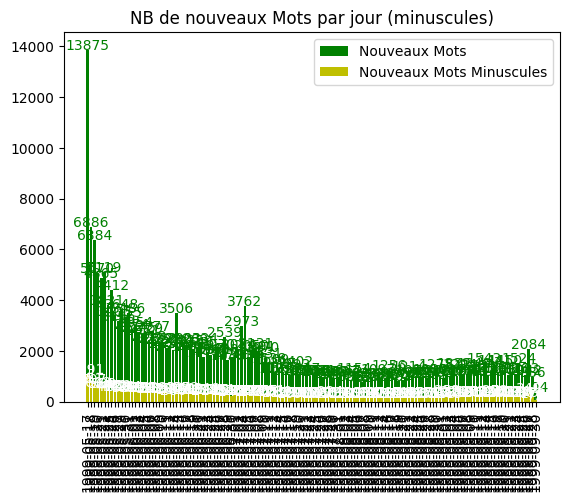

In [14]:
import matplotlib.pyplot as plt

dates = [date[0] for date in liste_effectifs]
new_words = [date[1] for date in liste_effectifs]
lowercase_word_count = [date[2] for date in liste_effectifs]

plt.figure()
plt.title('NB de nouveaux Mots par jour (minuscules)')

plt.bar(dates, new_words, color='green', label='Nouveaux Mots')
plt.bar(dates, lowercase_word_count, color='y', label='Nouveaux Mots Minuscules')

for i, v in enumerate(new_words):
    plt.text(i, v+1, str(v), color='g', ha='center')

for i, v in enumerate(lowercase_word_count ):
    plt.text(i, v+1, str(v), color='w', ha='center')

plt.legend()

plt.legend()
plt.xticks(rotation=90)
plt.show()


### Webster's Unabridged English Dictionary.

In [21]:
###préparons notre vocabualire anglaise
# https://github.com/adambom/dictionary


with open("../dictionary.json", encoding="utf8") as t:
    dic_Webster = json.load(t)
#
set_mots_Webster = [mot.lower() for mot in dic_Webster.keys()]
print("Taille Webster : %i types"%len(set_mots_Webster))  # type(mot unique) VS token

neo_emprunt = list(set(neologismeMIN).intersection(set_mots_Webster))
print("Taille neo : %i types"%len(neo_emprunt))  # type(mot unique) VS token

Taille Webster : 86036 types


NameError: name 'neologismeMIN' is not defined

In [16]:
chemin_neo_emprunt_Annee="./neo_emprunt/neo_emprunt.json"
neologisme_enprunt_Dico = {"Annee1999": neo_emprunt}
memoire_friendly(neologisme_enprunt_Dico, chemin_neo_emprunt_Annee)